# Analysis of Modern NFL Data # 

## Abstract ##

*** Introduction: ***

> In this lab, I will be analyzing recent NFL data in order to determine what factors are related to NFL athletes' success. I am very curious to see if a NFL player's height and weight effect how long they play for. I think that there is a lot of interesting coorelations and analyses to be found, especially considering this dataset contains over 100,000 rows of datapoints.

*** Specific Questions: *** 

>* *Exploratory*:
    - Is there a coorelation between a college football player's height and the amount of seasons they play for?
    - Is there a coorelation between a college football player's weight and the amount of seasons they play for?
* *Numerical*:
    - What is the average weight and height of an NFL player?
    - What is the most common college for NFL players?
    - What is the most common high school for NFL players?

## Dataset Information ##

*** About my [Dataset](https://www.kaggle.com/kendallgillies/nflstatistics): ***


>    In my dataset, there are 16 columns, and 17173 rows. There are 4 columns with integer data, two with dates, and the rest are strings. The numerical data is on the columns: 'age', 'height', 'weight', 'years played', and 'player ID'. The string data is on: 'current status', 'college', 'high school', 'player name', 'birthplace,' 'position', and 'birthday'.

*** My Plan to Address Missing Data: ***
>    The four columns that have missing data are all related to the current NFL team that the player plays for. That means that the team, team number, high school, and years played all have some sort of missing data. The way that I plan to clean my data is by putting in NaN’s where there is missing data, because there is no way for me to guess the current team. The player is either currently playing (which means they have data), or they are retired, which means that I can’t guess on their current team because they don’t have one.

*** The Variables I Plan on Using: ***
>    I plan on heavily relying on height, experience, and weight, to extrapolate and see if those variables have any effect on how many seasons the person played for and if college played a role on their seasons. I plan on dropping the player ID and position, because I see no way they can effectively be used. I also might drop the current team, because there is so much missing data.
    
*** How I plan on Cleaning my Data: ***
>    I plan on converting all of the season data to integers from strings, and making sure all of the missing data is converted to NaN’s. Finally, I will try to make sure the weight, height, and years played for variables are converted to machine-readable integers.
    
*** Planned Explatory Analysis: ***
>    As I said before, I plan on looking for a correlation between height, weight, and how many seasons a player played for. I am specifically interested in finding whether or not there are certain variables that affect how many seasons a NFL player plays for. I also plan on calculating the liklihood that someone remains in the NFL based on thier age, height, weight, and other statistics. This will suffice as my exploratory data and analysis.

## Dataset Preparation ## 

*** Importing Required Modules: ***

In [1]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

*** Opening the Dataset: ***

> I read the csv file into a dataframe called 'df', and then created a list of the column headers (for ease of access later on). Finally, I printed the head of the file, to see if Jupyter opened the datset correctly. 

In [2]:
df = pd.read_csv('./Basic_Stats.csv')
c = list(df.columns.values)

df.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN


*** Cleaning the Experience Column: ***
> Since the experience column had string data like '3 seasons' or '1 season', I wanted to convert the entire column into integer data. This would make it easier to analyze the effect of height and weight on seasons played, and would allow for the calculation of averages. To do this, I made a simple lambda function that just tries to take the first character of the string and use it as the integer value. I then printed out the column after this function was applied, and one can see that it worked perfectly.

In [3]:
# Convert to integer, or else set to 0
def to_num(x):
    try:
        return int(x[0])
    except:
        return 0

df[c[6]] = df[c[6]].apply(lambda x: to_num(x))

# Print first 10 items to prove that the lambda did what I wanted
df[c[6]][0:10]

0    3
1    1
2    1
3    5
4    3
5    1
6    3
7    0
8    1
9    1
Name: Experience, dtype: int64

*** Cleaning the Weight Column: ***
> The weight column had several values that were under 50 pounds, and since there is no reason why a NFL player should weigh less than a 10-year-old, I decided to turn any value under 50 pounds into a NaN. I did this by just looping through the entire column and running every item through a simple check.

In [4]:
# Change all weights under 50 lbs to NaN's
df.loc[df[c[14]] < 50, c[13]] = np.NaN

# Print first 10 items
df[c[14]][0:10]

0    185.0
1    235.0
2    230.0
3    255.0
4    305.0
5    180.0
6    185.0
7    250.0
8      NaN
9    175.0
Name: Weight (lbs), dtype: float64

*** Dropping Unusable Columns: ***
> I had no use for the 'Number', 'Player ID', 'Position', or 'High School Location' columns, so I simply dropped them with one line and then displayed the updated head. After that, the data cleaning was complete.

In [5]:
df = df.drop(['Number', 'Player Id', 'Position', 'High School Location'], axis=1)
df.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,Name,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3,71.0,NaN,"Evans, Fred",185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1,70.0,NaN,"Raiff, Jim",235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1,74.0,NaN,"Fowler, Bobby",230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5,73.0,NaN,"Johnson, Quinn",255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3,77.0,Clintondale HS,"Walton, L.T.",305.0,NaN


## Data Modelling ##

### Exploratory Analysis ###

*** Checking for Weight/Experience Coorelation: ***
> Two of the variables that I wanted to look for a coorelation between were player experience and weight, so I initially made a regression plot. As one can see, it is very hard to see any coorelation with a regression plot, especially because experience is effectively categorical data. Since there aren't any players who have played for more than 8 seasons, all of the data is within one of 8 categories. This meant that I had to look for a different model.

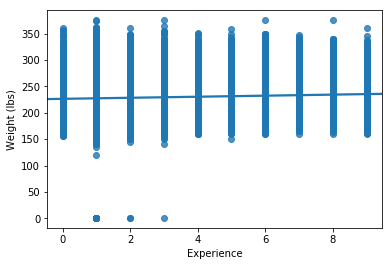

In [22]:
# Linear regression plot doesn't really show us anything
sns.regplot(x='Experience', y="Weight (lbs)", data=df)

*** A Different Coorelation Model: ***
> Since a regression model didn't really work for these two columns, I decided to look elsewhere. Luckily, violin plots seemed to work perfectly for my needs. They do a great job of relating numerical and categorical data, which is perfect for my application. Sadly, the violin plot definitevely proved that there was no correlation between how long a player plays for and their weight.

> Also, the violin plot for some reason displays the NaN values as zeros, which I spent an hour trying to address. Sadly, there doesn't seem to be an easy way to ignore NaN values, so they skew the data slightly. This does not however have a large effect on the data, since there are over 100,000 entries and a few NaN's aren't going to majorly affect the resulting information.

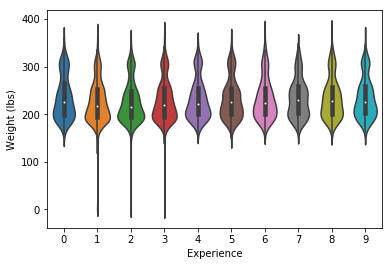

In [20]:
# Doesn't drop NaN's for some reason, but makes visual sense
sns.violinplot(x='Experience', y="Weight (lbs)", data=df)

*** Checking for Height/Experience Coorelation: ***
> Another two of the variables that I wanted to look for a coorelation between were player experience and height, so I initially made a strip plot, since the earlier regression plot didn't fit my needs well. As one can see, it is very hard to see any coorelation with a regression plot, especially because experience is effectively categorical data. Since there aren't any players who have played for more than 8 seasons, all of the data is within one of 8 categories. This meant that I had to look for a different model.

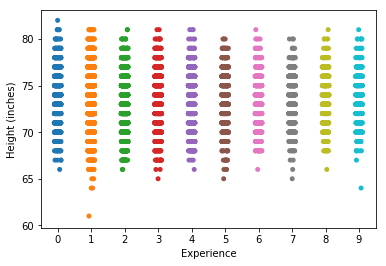

In [24]:
# Strip doesn't make sense -- too many datapoints to be useful
sns.stripplot(x='Experience', y="Height (inches)", jitter=1, data=df)

***  A Different Coorelation Model (Part 2): ***
> Since a stip plot didn't really work for these two columns, I decided to look elsewhere. I also didn't want to use a violin plot again, since I felt like another model might work better for these two columns. Luckily, a box plot works perfectly here. Sadly, it again proved that there was no correlation between how long a player plays for and their height.

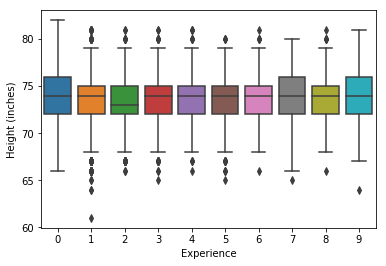

In [21]:
# Makes more sense for this application -- hard to see a coorelation
sns.boxplot(x='Experience', y="Height (inches)", data=df)

### Numerical Analysis ###

*** Finding the Average Weight of an NFL Player: ***
> To find the average weight of an NFL player, I simply took the mean of the weight column and printed it.

In [16]:
avg_weight = df['Weight (lbs)'].mean()

print('Average weight of an NFL player: %.2f pounds' %avg_weight)

Average weight of an NFL player: 229.22 pounds


*** Finding the Average Height of an NFL Player: ***
> To find the average height of an NFL player, I simply took the mean of the height column and printed it.

In [15]:
avg_height = df['Height (inches)'].mean()

print('Average height of an NFL player: %.2f inches' %avg_height)

Average height of an NFL player: 73.51 inches


*** Finding the Most Common High School of NFL Players: ***
> To find the most common high school of NFL players, I took the first element of the value_counts method result (which would be the max), and grabbed both the count and the id (the actual school name) of it. I then printed the result.

In [36]:
top_h = df['High School'].value_counts()[0]
top_school = df['High School'].value_counts().idxmax()

print('Most common highschool for NFL players: %s (%d)' %(top_school, top_h))

Most common highschool for NFL players: St. Thomas Aquinas HS (15)


*** Finding the Most Common College of NFL Players: ***
> To find the most common college of NFL players, I took the first element of the value_counts method result (which would be the max), and grabbed both the count and the id (the actual school name) of it. I then printed the result.

In [35]:
top_c = df['College'].value_counts()[0]
top_college = df['College'].value_counts().idxmax()

print('Most common college for NFL players: %s (%d)' %(top_college, top_c))

Most common college for NFL players: Notre Dame (305)


## Data Analysis & Conclusion ##

*** Conclusion: ***
> Although I was definitely unhappy with finding no correlatiton between height and experience or weight and experience, I think that the models that came out of the analysis are valuable. They definitevely prove that there is no correlation between those variablees, which means that the NFL favors skill over other inalterable atributes of a player like hieght or weight.

> I was definitely surprised that the average weight of a NFL player over 200 pounds. It was interesting to realize that different sports require vastly different attributes of their athletes.

> I was also interested to learn that the most common college of NFL players was Notre Dame. I would have thought it would be some school like U of Michigan or another massive state school. The most common high school was also fascinating to learn about.

> My biggest regret in this lab is that I couldn't figure out how to drop NaN values for the violin plot. Even though it didn't actually affect my graph on much more than a visual level (as I explained above the actual plot), it is still frustrating that I couldn't figure something out. If I had more time, I would spend a lot of it trying to fix that last pesky bug. Otherwise, I am exceptionally happy with how this lab turned out. Even with finding no correlation where I looked, the analysis and modelling went very smoothly for the most part.

## Acknowledgements ##
*** Ms. Sconyers: ***
> I would like to thank Ms. Sconyers for both helping me to better understand the way seaborn plots data, and also for introducing me to lambda functions in Python, which proved to be very useful in this lab.